In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('../')

from bin.basket_scoring import read_basket_scores, count_significant_baskets
from bin.sample_metadata import load
from bin.pca_plotting import group_tumor_cell_content

In [26]:
pd.set_option('display.max_rows', 20)
matplotlib.use('TkAgg')

In [27]:
#metadata_file = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230704.xlsx"
metadata_file = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx"
results_folder = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT"
use_zscored_input = True

In [28]:
df = read_basket_scores(results_folder, z_scored=use_zscored_input)
df.head()

,ABL,AKT,ALK,ALT_EJ,AURK,AXL,Apoptosis,BER,Biomarker,CDK4_6 activity,...,RHO_GTPases,SFKs,SHH,SHP2,SRC,TGFb,Tumorantigens,VEGFR,WNT,cellcycle
Sample,,,,,,,,,,,,,,,,,,,,,
H021-13A4TF-M1,-0.132245,-2.275939,0.321754,0.465184,-0.667008,0.265525,1.279335,0.000000,1.501138,0.487155,...,-0.409229,0.181788,2.367921,-0.514596,0.638262,-2.317947,0.193937,-1.398312,-0.069268,-0.715117
H021-188HA2-T2,0.308462,0.632235,-0.008278,-0.595651,1.108613,-0.001690,0.254197,-2.299776,-0.545625,0.752468,...,0.084632,-0.895467,-1.494269,-0.619998,-0.858539,-0.420200,0.104153,1.447493,0.654836,0.994156
H021-192LV1-M1,-0.212156,0.445418,-0.066680,-0.352538,0.937410,1.050853,1.205535,0.000000,0.239471,1.013072,...,0.773983,0.722832,0.866691,-0.693350,-0.352821,-0.449356,-1.286754,1.671367,0.428806,1.115597
H021-192LV1-M2,-0.491774,0.328398,-0.373172,0.345623,1.608493,0.924870,-1.559170,0.000000,-0.551840,2.226152,...,0.303502,-0.256423,0.597383,-0.549307,-0.518603,1.348313,-1.319198,1.385874,-0.629621,0.814215
H021-1AV9F5-T1-Q1,-0.882543,-0.182137,0.865521,0.422203,0.621314,1.006338,1.336166,0.000000,1.501138,-0.341790,...,0.240418,0.437853,-0.017063,0.056277,0.071268,-2.354174,0.057050,-0.088083,0.121232,-0.209393


In [29]:
metadata_df = load(metadata_file)
metadata_df = metadata_df.set_index('Sample name')
metadata_df

,Paper_pseudo_identifier,Program,Entity,code_oncotree,breadcrumb_oncotree,Histologic subtype,"Histologic subtype, specifications",ICD03 - Morpho ID,Timeline,Batch_No,...,year of birth,Discussed retrospective,Discussed prospective MTB,tissue_topology,tissue_topology_specification,Paper Entity,HD name,RNALibrarySize,RNAMappingRate,RNADuplicationRate
Sample name,,,,,,,,,,,,,,,,,,,,,
H021-M3FT7P-T1,P0081,MASTER,Sarcoma,MRLS,"SOLID>SOFT_TISSUE>LIPO>MRLS, Myxoid/Round-Cell...",Liposarcoma,"Liposarcoma, myxoid",8852/3,retrospective,8,...,nan,nan,nan,Soft Tissue,nan,STS,WES.M3FT7P.tumor,11779994,0.51055264,0.7749024
H021-RYWQDW-T4,P0163,MASTER,Sarcoma,LMS,"SOLID>SOFT_TISSUE>LMS, Leiomyosarcoma",Leiomyosarcoma,Leiomyosarcoma,8890/3,retrospective,16,...,1970,220325,nan,Digestive tract,Jejunum,STS,WES.RYWQDW.metastasis,0,0,0
H021-89DRF6-M1,P0673,MASTER,Sarcoma,MPNST,"SOLID>PNS>NST>MPNST, Malignant Peripheral Nerv...",Solitary fibrous tumor,Solitary fibrous tumor,missing,prospective,67,...,1969,nan,nan,Liver (Hep),nan,STS,WGS.89DRF6.metastasis,0,0,0
H021-YTWLBM-T3-E1,P0451,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,Chordoma,9370/3,retrospective,45,...,1962,nan,nan,Bone/Skeleton?,Sch√§del,Bone,WGS.YTWLBM.tumor02,0,0,0
H021-1GB4TR-M1,P0826,MASTER,other,NSGCT,"SOLID>TESTIS>NSGCT, Non-Seminomatous Germ Cell...",germ cell tumor,"germ cell tumor, nichtsemin√∂s",missing,prospective,82,...,1988,nan,nan,Lung (PUL),Lungenunterlappen,Testis,WGS.1GB4TR.metastasis,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I027-023-0T1-P1,P0528,INFORM,Sarcoma,SARCNOS,"SOLID>SOFT_TISSUE>SARCNOS, Sarcoma, NOS",Sarcoma NOS,proliferationsaktives Sarkom,missing,retrospective,52,...,2004,nan,nan,n.d.,Oberschenkel; links,STS,missing,missing,missing,missing
I022-063-1M1-P1,P1013,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,8910/3,prospective,101,...,2016,nan,nan,Soft Tissue,nan,STS,missing,missing,missing,missing
I015-017-0M1-P1,P0771,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,8910/3,prospective,77,...,2010,nan,nan,Lung (PUL),Lungenoberlappen,STS,missing,missing,missing,missing


In [30]:
df.index = df.index.str.replace(r"-R\d+$", "", regex=True) # remove replicate suffixes
df = df.loc[~df.index.str.contains("targets_"), :]

exclude_baskets = [
    "ALT_EJ",
    "Apoptosis",
    "BER",
    "Biomarker",
    "FA",
    "HR",
    "IFN",
    "Immune_checkpoints",
    "Infiltration_Inflammation",
    "NER",
    "NHEJ",
    "RHO_GTPases",
    "SHP2",
    "TGFb",
    "Tumorantigens",
]
df = df.loc[:, ~df.columns.isin(exclude_baskets)]
df = df.replace(0, np.nan)

In [31]:
df_zscored = df
if not use_zscored_input:
    from bin.metrics import Metrics

    def drop_prefix(self, prefix):
        self.columns = self.columns.str.lstrip(prefix)
        return self
    pd.core.frame.DataFrame.drop_prefix = drop_prefix

    df_zscored = Metrics.get_zscore(df.T)
    df_zscored = df_zscored.drop_prefix('zscore_')
    df_zscored = df_zscored.T
df_zscored

,ABL,AKT,ALK,AURK,AXL,CDK4_6 activity,DDR,EGFR,EPH,ERBB,...,PLK1,RAF,RAS,RET,SFKs,SHH,SRC,VEGFR,WNT,cellcycle
Sample,,,,,,,,,,,,,,,,,,,,,
H021-13A4TF-M1,-0.132245,-2.275939,0.321754,-0.667008,0.265525,0.487155,-0.410837,0.273413,2.498590,-1.590216,...,-1.167366,-0.989659,-1.013820,1.156271,0.181788,2.367921,0.638262,-1.398312,-0.069268,-0.715117
H021-188HA2-T2,0.308462,0.632235,-0.008278,1.108613,-0.001690,0.752468,1.545085,-0.415397,0.732563,-0.487610,...,0.355824,0.923059,-0.376271,-0.385722,-0.895467,-1.494269,-0.858539,1.447493,0.654836,0.994156
H021-192LV1-M1,-0.212156,0.445418,-0.066680,0.937410,1.050853,1.013072,-0.684733,0.031319,-0.140450,-1.085776,...,0.666135,-0.175021,-0.038283,0.013737,0.722832,0.866691,-0.352821,1.671367,0.428806,1.115597
H021-192LV1-M2,-0.491774,0.328398,-0.373172,1.608493,0.924870,2.226152,-0.156656,0.051445,-1.370653,-0.080410,...,0.804115,1.819567,0.595693,0.891542,-0.256423,0.597383,-0.518603,1.385874,-0.629621,0.814215
H021-1AV9F5-T1-Q1,-0.882543,-0.182137,0.865521,0.621314,1.006338,-0.341790,0.026277,0.031140,-0.680246,-0.534443,...,-0.498063,0.063543,1.644841,0.452789,0.437853,-0.017063,0.071268,-0.088083,0.121232,-0.209393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S033-33+003-T2-Q1,0.529736,-1.183974,2.264640,-0.447277,0.600992,-0.563295,0.857362,-0.309502,-0.462657,-1.750692,...,-0.423505,0.923237,0.759572,-0.020702,0.549053,0.941872,0.834751,-0.432069,-0.824058,-1.498254
S033-33+004-T1-Q1,0.279961,1.812566,0.718477,-0.816365,0.850702,-0.351818,0.016755,2.501623,-0.437170,0.888717,...,-0.872017,1.050680,1.253643,0.708860,0.459946,1.291688,-0.616417,0.230641,1.464242,-2.316158
S033-33+004-T2-Q1,0.172999,-0.558343,1.610302,0.597726,0.424779,0.571547,0.222132,0.175550,1.298189,0.061310,...,0.164517,1.393496,0.581097,0.081318,0.433171,0.996052,0.036897,0.264926,0.172440,-1.485002


In [32]:
# significant_baskets_per_patient = count_significant_baskets(df_zscored, [2.0, 1.5])
significant_baskets_per_patient = count_significant_baskets(df_zscored, [2.0, 1.5, 1.2])
significant_baskets_per_patient['num_significant_baskets'].value_counts()

0     269
1     181
2      82
3      42
4      23
5      21
7       6
6       6
8       3
11      1
9       1
10      1
Name: num_significant_baskets, dtype: int64

In [9]:
# metadata_df_without_significant_baskets = metadata_df.join(significant_baskets_per_patient, validate="one_to_one")
# output_file = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801_with_num_significant_baskets_annotated.tsv"
# metadata_df_without_significant_baskets.to_csv(output_file, sep='\t')

In [33]:
significant_baskets_per_patient = significant_baskets_per_patient.join(metadata_df[['Tumor cell content', 'TCC_Bioinf_MASTER', 'Histologic subtype']], validate="one_to_one")
tumor_cell_content_categories = ['missing','0-10%','10-20%','20-30%','30-40%','40-60%','60-80%','80-100%']
# we apparently trust the bioinfo TCC estimate more than the pathology estimate
significant_baskets_per_patient['Tumor cell content category'] = significant_baskets_per_patient['TCC_Bioinf_MASTER'].apply(group_tumor_cell_content)
significant_baskets_per_patient['Tumor cell content category'] = significant_baskets_per_patient['Tumor cell content category'].replace('missing', np.nan)
significant_baskets_per_patient['Tumor cell content category'] = significant_baskets_per_patient['Tumor cell content category'].combine_first(significant_baskets_per_patient['Tumor cell content'].apply(group_tumor_cell_content))
significant_baskets_per_patient['Tumor cell content category'] = pd.Categorical(significant_baskets_per_patient['Tumor cell content category'], tumor_cell_content_categories)
significant_baskets_per_patient['Tumor cell content category'].value_counts()

80-100%    274
60-80%     139
40-60%      87
0-10%       47
30-40%      38
20-30%      30
10-20%      20
missing      1
Name: Tumor cell content category, dtype: int64

In [34]:
# significant_baskets_per_patient['num_significant_baskets'] = significant_baskets_per_patient['num_significant_baskets'].clip(0,5)

Text(0.5, 0, '#significant baskets')

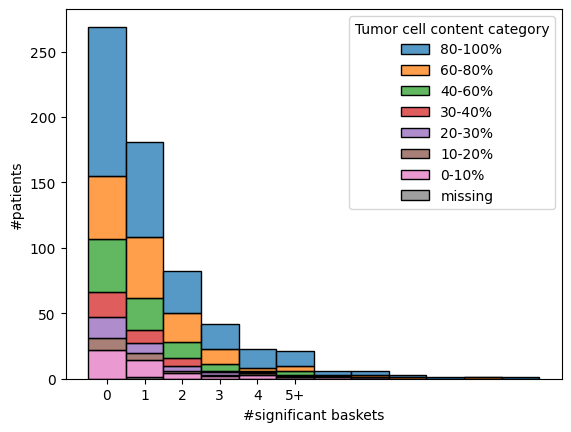

In [35]:
%matplotlib inline
sns.histplot(data=significant_baskets_per_patient, x="num_significant_baskets", hue="Tumor cell content category", multiple="stack", hue_order=['missing','0-10%','10-20%','20-30%','30-40%','40-60%','60-80%','80-100%'][::-1], discrete=True)
plt.xticks(np.arange(6), labels=[str(i) if i < 5 else "5+" for i in range(6)])
plt.ylabel("#patients")
plt.xlabel("#significant baskets")

Text(0.5, 0, 'tumor cell content')

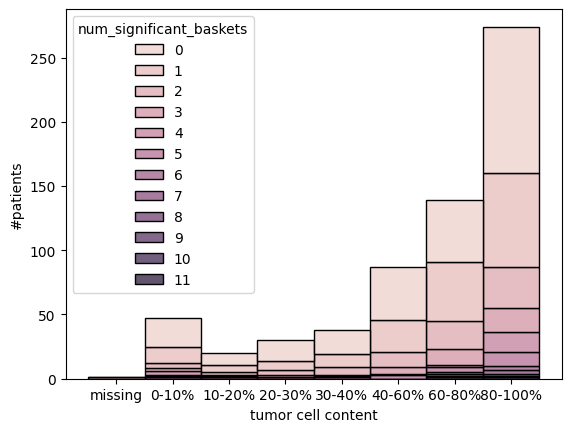

In [36]:
%matplotlib inline
sns.histplot(data=significant_baskets_per_patient, x="Tumor cell content category", hue="num_significant_baskets", multiple="stack", discrete=True)
plt.ylabel("#patients")
plt.xlabel("tumor cell content")

In [37]:
significant_baskets_per_patient.groupby(["Tumor cell content category", "num_significant_baskets"]).size().reset_index(name='Count')

,Tumor cell content category,num_significant_baskets,Count
0,missing,0,0
1,missing,1,1
2,missing,2,0
3,missing,3,0
4,missing,4,0
...,...,...,...
91,80-100%,7,3
92,80-100%,8,2
93,80-100%,9,1
94,80-100%,10,0


In [38]:
counts_table = significant_baskets_per_patient.pivot_table(index="Tumor cell content category", columns="num_significant_baskets", aggfunc='size', fill_value=0)
counts_table

num_significant_baskets,0,1,2,3,4,5,6,7,8,9,10,11
Tumor cell content category,,,,,,,,,,,,
missing,0,1,0,0,0,0,0,0,0,0,0,0
0-10%,22,13,4,2,3,1,1,1,0,0,0,0
10-20%,9,6,2,1,1,0,1,0,0,0,0,0
20-30%,16,7,4,2,0,1,0,0,0,0,0,0
30-40%,19,10,6,1,1,1,0,0,0,0,0,0
40-60%,41,25,12,5,1,3,0,0,0,0,0,0
60-80%,48,46,22,12,2,4,1,2,1,0,1,0
80-100%,114,73,32,19,15,11,3,3,2,1,0,1


In [39]:
set(metadata_df.index) - set(significant_baskets_per_patient.index)

{'I049-023-3M1-P1-R2'}

In [40]:
set(significant_baskets_per_patient.index) - set(metadata_df.index)

set()

In [41]:
metadata_df_without_significant_baskets = metadata_df.drop(columns=['Histologic subtype', 'Tumor cell content', 'TCC_Bioinf_MASTER']).join(significant_baskets_per_patient, validate="one_to_one")
# print(metadata_df_without_significant_baskets['Tumor cell content category'].value_counts())
# metadata_df_without_significant_baskets = metadata_df_without_significant_baskets[metadata_df_without_significant_baskets['num_significant_baskets'] == 0]
# print(metadata_df_without_significant_baskets['Tumor cell content category'].value_counts())
metadata_df_without_significant_baskets

,Paper_pseudo_identifier,Program,Entity,code_oncotree,breadcrumb_oncotree,"Histologic subtype, specifications",ICD03 - Morpho ID,Timeline,Batch_No,TMT_Channel,...,RNALibrarySize,RNAMappingRate,RNADuplicationRate,num_significant_baskets,num_significant_baskets_z>1.5,num_significant_baskets_z>1.2,Tumor cell content,TCC_Bioinf_MASTER,Histologic subtype,Tumor cell content category
Sample name,,,,,,,,,,,,,,,,,,,,,
H021-M3FT7P-T1,P0081,MASTER,Sarcoma,MRLS,"SOLID>SOFT_TISSUE>LIPO>MRLS, Myxoid/Round-Cell...","Liposarcoma, myxoid",8852/3,retrospective,8,1,...,11779994,0.51055264,0.7749024,3.0,5.0,8.0,64,0,Liposarcoma,0-10%
H021-RYWQDW-T4,P0163,MASTER,Sarcoma,LMS,"SOLID>SOFT_TISSUE>LMS, Leiomyosarcoma",Leiomyosarcoma,8890/3,retrospective,16,3,...,0,0,0,3.0,4.0,9.0,81,27,Leiomyosarcoma,20-30%
H021-89DRF6-M1,P0673,MASTER,Sarcoma,MPNST,"SOLID>PNS>NST>MPNST, Malignant Peripheral Nerv...",Solitary fibrous tumor,missing,prospective,67,3,...,0,0,0,1.0,3.0,10.0,63,38,Solitary fibrous tumor,30-40%
H021-YTWLBM-T3-E1,P0451,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,9370/3,retrospective,45,1,...,0,0,0,0.0,1.0,4.0,57,44,Chordoma,40-60%
H021-1GB4TR-M1,P0826,MASTER,other,NSGCT,"SOLID>TESTIS>NSGCT, Non-Seminomatous Germ Cell...","germ cell tumor, nichtsemin√∂s",missing,prospective,82,6,...,0,0,0,1.0,3.0,3.0,42,45,germ cell tumor,40-60%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I027-023-0T1-P1,P0528,INFORM,Sarcoma,SARCNOS,"SOLID>SOFT_TISSUE>SARCNOS, Sarcoma, NOS",proliferationsaktives Sarkom,missing,retrospective,52,8,...,missing,missing,missing,3.0,9.0,15.0,100,100,Sarcoma NOS,80-100%
I022-063-1M1-P1,P1013,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Embryonal Rhabdomyosarcoma,8910/3,prospective,101,3,...,missing,missing,missing,1.0,3.0,4.0,100,100,Rhabdomyosarcoma,80-100%
I015-017-0M1-P1,P0771,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Embryonal Rhabdomyosarcoma,8910/3,prospective,77,1,...,missing,missing,missing,0.0,1.0,3.0,100,100,Rhabdomyosarcoma,80-100%


In [42]:
low_tcc = ['0-10%','10-20%','20-30%']
metadata_df_without_significant_baskets['Low TCC, z-score > 1.2'] = (metadata_df_without_significant_baskets['num_significant_baskets_z>1.2'] > 0) & (metadata_df_without_significant_baskets['Tumor cell content category'].isin(low_tcc))
metadata_df_without_significant_baskets['Low TCC, z-score > 1.5'] = (metadata_df_without_significant_baskets['num_significant_baskets_z>1.5'] > 0) & (metadata_df_without_significant_baskets['Tumor cell content category'].isin(low_tcc))

metadata_df_without_significant_baskets['INFORM, z-score > 1.2'] = (metadata_df_without_significant_baskets['num_significant_baskets_z>1.2'] > 0) & (metadata_df_without_significant_baskets.index.str.startswith('I0'))
metadata_df_without_significant_baskets['INFORM, z-score > 1.5'] = (metadata_df_without_significant_baskets['num_significant_baskets_z>1.5'] > 0) & (metadata_df_without_significant_baskets.index.str.startswith('I0'))

In [45]:
df = read_basket_scores(results_folder, z_scored=use_zscored_input)
df.index = df.index.str.replace(r"-R\d+$", "", regex=True)
df = df.loc[~df.index.str.contains("targets_"), :]

include_baskets = ["MMR",
"NER",
"NHEJ",
"FA",
"HR",
"ALT_EJ",
"BER",
"TGFb",
"SHP2",
"Apoptosis",
"Infiltration_Inflammation",
"Tumorantigens",
]
df = df.loc[:, df.columns.isin(include_baskets)]
df = df.replace(0, np.nan)

<Axes: ylabel='Frequency'>

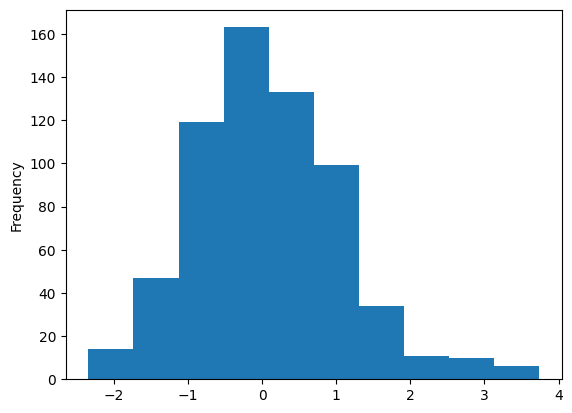

In [46]:
df['Tumorantigens'].plot.hist()

In [47]:
df_zscored = df
if not use_zscored_input:
    from bin.metrics import Metrics

    def drop_prefix(self, prefix):
        self.columns = self.columns.str.lstrip(prefix)
        return self
    pd.core.frame.DataFrame.drop_prefix = drop_prefix

    df_zscored = Metrics.get_zscore(df.T)
    df_zscored = df_zscored.drop_prefix('zscore_')
    df_zscored = df_zscored.T
df_zscored

,ALT_EJ,Apoptosis,BER,FA,HR,Infiltration_Inflammation,MMR,NER,NHEJ,SHP2,TGFb,Tumorantigens
Sample,,,,,,,,,,,,
H021-13A4TF-M1,0.465184,1.279335,NaN,NaN,NaN,-2.851962,-1.534324,1.192531,-1.256079,-0.514596,-2.317947,0.193937
H021-188HA2-T2,-0.595651,0.254197,-2.299776,-2.872125,-2.195481,-0.320689,-0.430338,-0.360116,-1.072187,-0.619998,-0.420200,0.104153
H021-192LV1-M1,-0.352538,1.205535,NaN,NaN,NaN,0.832796,-1.199185,1.192531,0.140641,-0.693350,-0.449356,-1.286754
H021-192LV1-M2,0.345623,-1.559170,NaN,NaN,NaN,0.768150,-0.145352,1.192531,-0.095038,-0.549307,1.348313,-1.319198
H021-1AV9F5-T1-Q1,0.422203,1.336166,NaN,NaN,NaN,0.593566,1.521324,-0.505396,1.113311,0.056277,-2.354174,0.057050
...,...,...,...,...,...,...,...,...,...,...,...,...
S033-33+003-T2-Q1,1.944928,0.502403,-0.515291,NaN,NaN,-0.037670,1.453641,-0.313893,1.113311,2.322254,-0.049684,-0.479673
S033-33+004-T1-Q1,0.971405,-1.018244,NaN,-1.596022,-1.865558,-0.812111,0.131069,1.192531,0.399462,1.411613,0.706721,-0.392445
S033-33+004-T2-Q1,0.659925,-0.294918,-1.286634,-1.857277,NaN,-1.280467,-0.568730,0.064648,-0.269740,2.454659,0.492092,-1.095765


In [48]:
significant_other_baskets_per_patient = (df_zscored > 1.5).sum(axis=1).to_frame('num_significant_other_baskets_z>1.5')
metadata_df_without_significant_baskets = metadata_df_without_significant_baskets.join(significant_other_baskets_per_patient, how="left")
metadata_df_without_significant_baskets

,Paper_pseudo_identifier,Program,Entity,code_oncotree,breadcrumb_oncotree,"Histologic subtype, specifications",ICD03 - Morpho ID,Timeline,Batch_No,TMT_Channel,...,num_significant_baskets_z>1.2,Tumor cell content,TCC_Bioinf_MASTER,Histologic subtype,Tumor cell content category,"Low TCC, z-score > 1.2","Low TCC, z-score > 1.5","INFORM, z-score > 1.2","INFORM, z-score > 1.5",num_significant_other_baskets_z>1.5
Sample name,,,,,,,,,,,,,,,,,,,,,
H021-M3FT7P-T1,P0081,MASTER,Sarcoma,MRLS,"SOLID>SOFT_TISSUE>LIPO>MRLS, Myxoid/Round-Cell...","Liposarcoma, myxoid",8852/3,retrospective,8,1,...,8.0,64,0,Liposarcoma,0-10%,True,True,False,False,3.0
H021-RYWQDW-T4,P0163,MASTER,Sarcoma,LMS,"SOLID>SOFT_TISSUE>LMS, Leiomyosarcoma",Leiomyosarcoma,8890/3,retrospective,16,3,...,9.0,81,27,Leiomyosarcoma,20-30%,True,True,False,False,0.0
H021-89DRF6-M1,P0673,MASTER,Sarcoma,MPNST,"SOLID>PNS>NST>MPNST, Malignant Peripheral Nerv...",Solitary fibrous tumor,missing,prospective,67,3,...,10.0,63,38,Solitary fibrous tumor,30-40%,False,False,False,False,0.0
H021-YTWLBM-T3-E1,P0451,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,9370/3,retrospective,45,1,...,4.0,57,44,Chordoma,40-60%,False,False,False,False,0.0
H021-1GB4TR-M1,P0826,MASTER,other,NSGCT,"SOLID>TESTIS>NSGCT, Non-Seminomatous Germ Cell...","germ cell tumor, nichtsemin√∂s",missing,prospective,82,6,...,3.0,42,45,germ cell tumor,40-60%,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I027-023-0T1-P1,P0528,INFORM,Sarcoma,SARCNOS,"SOLID>SOFT_TISSUE>SARCNOS, Sarcoma, NOS",proliferationsaktives Sarkom,missing,retrospective,52,8,...,15.0,100,100,Sarcoma NOS,80-100%,False,False,True,True,0.0
I022-063-1M1-P1,P1013,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Embryonal Rhabdomyosarcoma,8910/3,prospective,101,3,...,4.0,100,100,Rhabdomyosarcoma,80-100%,False,False,True,True,0.0
I015-017-0M1-P1,P0771,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Embryonal Rhabdomyosarcoma,8910/3,prospective,77,1,...,3.0,100,100,Rhabdomyosarcoma,80-100%,False,False,True,True,0.0


In [49]:
output_file = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801_with_significant_TUPAC_annotations_updated_zscores.tsv"
metadata_df_without_significant_baskets.to_csv(output_file, sep='\t')